In [1]:
import copy
from keypress_recognition.models import keyboard_model
from keypress_recognition import dataset
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
dataset.load_all_data(train=100, test=20, val=10)

# of X_train: 100
# of X_test: 20
# of X_val: 10


In [3]:
black_indices = np.array([1, 4, 6, 9, 11, 13, 16, 18, 21, 23, 25, 28, 30, 33, 35, 37, 40, 42, 45, 47, 49, 52, 54, 57, 59, 61, 64, 66, 69, 71, 73, 76, 78, 81, 83, 85])
def visualize_keys(notes):
    """
    notes: size (88,)
    """
    key_color = np.zeros(88, dtype=bool)
    key_color[black_indices] = True
    print(key_color.shape, notes.shape)
    for i in key_color:
        print("🌚" if i else "🏐", end="")
    print()
    for i in notes:
        print("🔶" if i else "🔷", end="")
    print()
visualize_keys(np.array([0,1,0,1] + [0]*84))

(88,) (88,)
🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐
🔷🔶🔷🔶🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷


In [4]:
# print several keyboard images with labels

p, n = dataset.get_sample('train', img=False, method=2)
print(p)

keypress_recognition/dataset/X_train\V09619.jpg


(88,) (88,)
🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔶🔷🔷🔶🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
(88,) (88,)
🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐
🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔶🔷🔷🔷🔶🔷🔷🔶🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔶🔷🔷🔷🔶🔷🔷🔶🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷
(88,) (88,)
🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🏐🌚🏐🌚🏐🌚🏐🏐
🔶🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷🔷


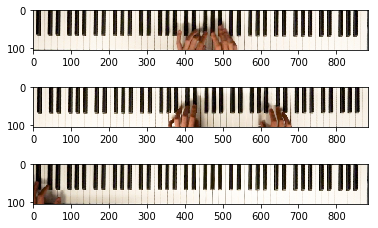

In [5]:
# print several keyboard images with labels
f, a = plt.subplots(3, 1)
for i in range(3):
    
    img, notes = dataset.get_sample('train', method=2)
    a[i].imshow(img)
    visualize_keys(notes)

plt.show()

In [8]:
keyboard_model.train(dataset, batch_size=32, num_epochs=20,
                     learning_rate=1e-3,
                     best_path='keypress_recognition/best_keyboard_model.tar',
                     current_path='keypress_recognition/current_keyboard.tar')

RuntimeError: CUDA out of memory. Tried to allocate 166.00 MiB (GPU 0; 6.00 GiB total capacity; 4.39 GiB already allocated; 124.84 MiB free; 65.89 MiB cached)

In [ ]:
X, notes = dataset.get_sample('train', method=2)
plt.imshow(X)
plt.show()
print("===GROUND TRUTH===")
visualize_keys(notes)


X = np.transpose(X, [2, 0, 1])[None]
X = torch.Tensor(X)
if torch.cuda.is_available():
    X = X.cuda()
    
    
y = keyboard_model.evaluate(X, threshold=0.5)[0]
print("+++PREDICTION+++")
visualize_keys(y)
print(y)